In [1]:
!pip install plotly matplotlib

In [2]:
import plotly
plotly.tools.set_credentials_file(username='cgddrd', api_key='F7STNJas2eDGiBpOva9a')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('../data/raw/ga.csv', header=0)
df.head()


,date,category,metric,value
0,2017-12-04,Branded Search,app_store,65
1,2017-12-04,Branded Search,complete_quote,437
2,2017-12-04,Branded Search,save_quote,165
3,2017-12-04,Branded Search,start_quote,491
4,2017-12-04,Branded Search,visitors,901


In [5]:
data = df.groupby(['metric'])['value'].sum().sort_values(ascending=False)

In [6]:
import plotly.plotly as py
from plotly import graph_objs as go

from __future__ import division

# chart stages data
values = data.values
phases = data.index.values

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)', 'rgb(35,154,2)']

In [7]:
n_phase = len(phases)
 
# the fixed width for the plot
plot_width = 400
 
# height of a section and difference between sections 
section_h = 100
section_d = 10
 
# multiply factor to calculate the width of other sections
unit_width = plot_width / max(values)
 
# width for all the sections (phases)
phase_w = [int(value * unit_width) for value in values]

In [8]:
height = section_h * n_phase + section_d * (n_phase-1)
 
shapes = []
 
label_y = []
 
for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i]/2, height, phase_w[i]/2, height - section_h]
        else:
                points = [phase_w[i]/2, height, phase_w[i+1]/2, height - section_h]
 
        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)
 
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (phase name and value)
        label_y.append(height - (section_h / 2))
 
        height = height - (section_h + section_d)

In [9]:
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

In [10]:
data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(230,230,230)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

In [11]:
data = df.groupby(['metric'])['value'].sum().sort_values(ascending=False)
data = data[~data.index.str.contains("app_store")]
data

import plotly.plotly as py
from plotly import graph_objs as go

from __future__ import division

# chart stages data
values = data.values
phases = data.index.values

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)', 'rgb(35,154,2)']

n_phase = len(phases)
 
# the fixed width for the plot
plot_width = 400
 
# height of a section and difference between sections 
section_h = 100
section_d = 10
 
# multiply factor to calculate the width of other sections
unit_width = plot_width / max(values)
 
# width for all the sections (phases)
phase_w = [int(value * unit_width) for value in values]

height = section_h * n_phase + section_d * (n_phase-1)
 
shapes = []
 
label_y = []
 
for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i]/2, height, phase_w[i]/2, height - section_h]
        else:
                points = [phase_w[i]/2, height, phase_w[i+1]/2, height - section_h]
 
        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)
 
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (phase name and value)
        label_y.append(height - (section_h / 2))
 
        height = height - (section_h + section_d)
    
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(230,230,230)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

In [12]:
data = df.groupby(['metric'])['value'].sum().sort_values(ascending=False)
data = data[['visitors','app_store']]
data

import plotly.plotly as py
from plotly import graph_objs as go

from __future__ import division

# chart stages data
values = data.values
phases = data.index.values

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)', 'rgb(35,154,2)']

n_phase = len(phases)
 
# the fixed width for the plot
plot_width = 400
 
# height of a section and difference between sections 
section_h = 100
section_d = 10
 
# multiply factor to calculate the width of other sections
unit_width = plot_width / max(values)
 
# width for all the sections (phases)
phase_w = [int(value * unit_width) for value in values]

height = section_h * n_phase + section_d * (n_phase-1)
 
shapes = []
 
label_y = []
 
for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i]/2, height, phase_w[i]/2, height - section_h]
        else:
                points = [phase_w[i]/2, height, phase_w[i+1]/2, height - section_h]
 
        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)
 
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (phase name and value)
        label_y.append(height - (section_h / 2))
 
        height = height - (section_h + section_d)
    
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(230,230,230)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

In [13]:
grouped_seg = df.groupby(['metric', 'category'])["value"].sum().sort_values(ascending=False).reset_index()
grouped_seg

,metric,category,value
0,visitors,Generic Search,118062
1,visitors,Paid search,66905
2,start_quote,Generic Search,37415
3,complete_quote,Generic Search,29696
4,visitors,Direct Traffic,27966
5,start_quote,Paid search,23565
6,visitors,Referral link,21405
7,complete_quote,Paid search,17662
8,visitors,Organic,14404
9,start_quote,Referral link,11900


In [14]:
grouped_seg = grouped_seg.groupby('metric').apply(
    lambda f: f.groupby('category').apply(
        lambda g: g['value'].values
    ))
grouped_seg



category,Branded Search,Direct Traffic,Generic Search,Organic,Paid search,Referral link
metric,,,,,,
app_store,[637],[793],[4231],[1328],[1361],[1361]
complete_quote,[4543],[1427],[29696],[4604],[17662],[10383]
save_quote,[1824],[690],[11003],[1719],[4300],[6049]
start_quote,[5223],[1730],[37415],[5264],[23565],[11900]
visitors,[10884],[27966],[118062],[14404],[66905],[21405]


In [15]:
grouped_seg['sum'] = df.groupby('metric')['value'].sum()
grouped_seg

grouped_seg = grouped_seg.sort_values('sum', ascending=False)
# grouped_seg = grouped_seg.T
grouped_seg


category,Branded Search,Direct Traffic,Generic Search,Organic,Paid search,Referral link,sum
metric,,,,,,,
visitors,[10884],[27966],[118062],[14404],[66905],[21405],259626
start_quote,[5223],[1730],[37415],[5264],[23565],[11900],85097
complete_quote,[4543],[1427],[29696],[4604],[17662],[10383],68315
save_quote,[1824],[690],[11003],[1719],[4300],[6049],25585
app_store,[637],[793],[4231],[1328],[1361],[1361],9711


In [16]:
# grouped = df.groupby(['category'])["value"].sum().sort_values(ascending=False)

# grouped_seg = df.groupby(['category', 'metric'])["value"].sum().sort_values(ascending=False).reset_index()

# #grouped_seg = grouped_seg.groupby('category').apply(lambda f: f['value'].values.tolist()).to_dict()

# # group by 
# grouped_seg = grouped_seg.groupby('category').apply(
#     lambda f: f.groupby('metric').apply(
#         lambda g: g['value'].values
#     ))

# df_rows = list(grouped_seg.iterrows())
# grouped_seg

In [17]:
total = grouped_seg['sum'].values
total



array([259626,  85097,  68315,  25585,   9711])

In [18]:
grouped_seg = grouped_seg.drop('sum', axis=1) 
grouped_seg.index.tolist()


['visitors', 'start_quote', 'complete_quote', 'save_quote', 'app_store']

In [19]:
n_phase, n_seg = (5, 6)


In [20]:
plot_width = 600
unit_width = plot_width / total[0]
 
phase_w = [int(value * unit_width) for value in total]
 
# height of a section and difference between sections 
section_h = 100
section_d = 10

# shapes of the plot
shapes = []
 
# plot traces data
data = []
 
# height of the phase labels
label_y = []

In [21]:
height = section_h * n_phase + section_d * (n_phase-1)

# rows of the DataFrame
df_rows = list(grouped_seg.iterrows())

# iteration over all the phases
for i in range(n_phase):
    # phase name
    row_name = df.index[i]
    
    # width of each segment (smaller rectangles) will be calculated
    # according to their contribution in the total users of phase
    seg_unit_width = phase_w[i] / total[i]
    seg_w = [int(df_rows[i][1][j] * seg_unit_width) for j in range(n_seg)]
    
    # starting point of segment (the rectangle shape) on the X-axis
    xl = -1 * (phase_w[i] / 2)
    
    # iteration over all the segments
    for j in range(n_seg):
        # name of the segment
        seg_name = grouped_seg.columns[j]
        
        # corner points of a segment used in the SVG path
        points = [xl, height, xl + seg_w[j], height, xl + seg_w[j], height - section_h, xl, height - section_h]
        path = 'M {0} {1} L {2} {3} L {4} {5} L {6} {7} Z'.format(*points)
        
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[j],
                'line': {
                    'width': 1,
                    'color': colors[j]
                }
        }
        shapes.append(shape)
        
        # to support hover on shapes
        hover_trace = go.Scatter(
            x=[xl + (seg_w[j] / 2)],
            y=[height - (section_h / 2)],
            mode='markers',
            marker=dict(
                size=min(seg_w[j]/2, (section_h / 2)),
                color='rgba(255,255,255,1)'
            ),
            text="Segment : %s" % (seg_name),
            name="Value : %d" % (grouped_seg[seg_name][row_name])
        )
        data.append(hover_trace)
        
        xl = xl + seg_w[j]

    label_y.append(height - (section_h / 2))

    height = height - (section_h + section_d)

In [22]:
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=grouped_seg.index.tolist(),
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

data.append(label_trace)
 
# For phase values (total)
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=total,
    textfont=dict(
        color='rgb(200,200,200)',
        size=10
    )
)

data.append(value_trace)

In [23]:
layout = go.Layout(
    title="<b>Segmented Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(230,230,230)'
    ),
    hovermode='closest',
    shapes=shapes,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)

fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)

In [24]:
grouped_seg

category,Branded Search,Direct Traffic,Generic Search,Organic,Paid search,Referral link
metric,,,,,,
visitors,[10884],[27966],[118062],[14404],[66905],[21405]
start_quote,[5223],[1730],[37415],[5264],[23565],[11900]
complete_quote,[4543],[1427],[29696],[4604],[17662],[10383]
save_quote,[1824],[690],[11003],[1719],[4300],[6049]
app_store,[637],[793],[4231],[1328],[1361],[1361]


In [25]:
grouped_seg.index

Index(['visitors', 'start_quote', 'complete_quote', 'save_quote', 'app_store'], dtype='object', name='metric')

In [26]:
grouped_seg.columns

Index(['Branded Search', 'Direct Traffic', 'Generic Search', 'Organic',
       'Paid search', 'Referral link'],
      dtype='object', name='category')

In [27]:
grouped_seg.iloc[0]

category
Branded Search     [10884]
Direct Traffic     [27966]
Generic Search    [118062]
Organic            [14404]
Paid search        [66905]
Referral link      [21405]
Name: visitors, dtype: object

In [28]:
grouped_seg = grouped_seg.T

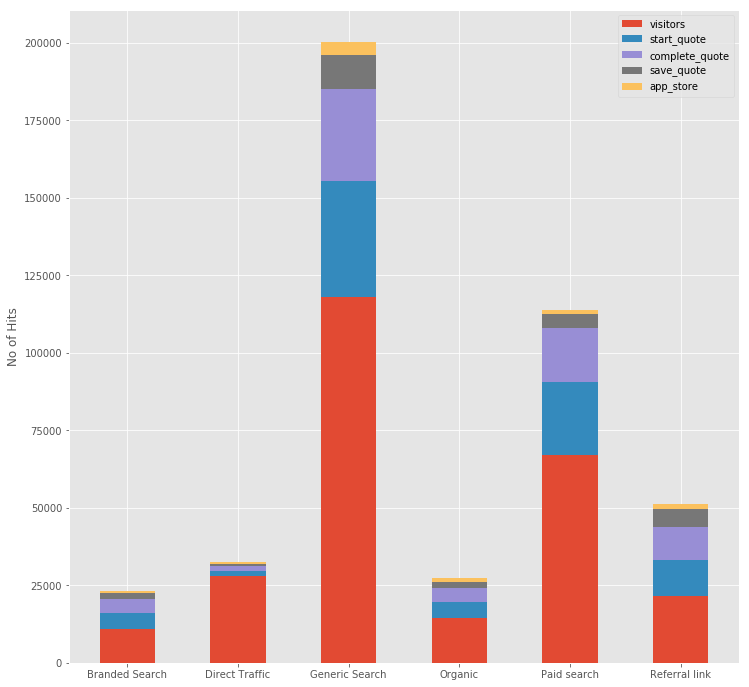

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

ind = np.arange(len(grouped_seg.index))

plt.figure(figsize=(12, 12))
width = 0.5   

i = 0
ny = len(grouped_seg[grouped_seg.columns[0]])
cum_size = np.zeros(ny)

for column in grouped_seg:
    
    data = np.concatenate(grouped_seg[column].values, axis=0)
    plt.bar(ind, data, width, bottom=cum_size, label=column)
    
    cum_size += data

plt.ylabel('No of Hits')
plt.xticks(ind, grouped_seg.index)
plt.legend()
plt.show()

### Conversion by Week

In [30]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv('../data/raw/ga.csv', header=0, parse_dates=['date'], date_parser=dateparse, index_col='date')
df.head()

,category,metric,value
date,,,
2017-12-04,Branded Search,app_store,65
2017-12-04,Branded Search,complete_quote,437
2017-12-04,Branded Search,save_quote,165
2017-12-04,Branded Search,start_quote,491
2017-12-04,Branded Search,visitors,901


In [31]:
metrics = df[df['metric'] == 'visitors'].groupby(pd.Grouper(freq='W'))['value'].sum()
metrics = pd.DataFrame(metrics)
metrics['save_quote'] = df[df['metric'] == 'save_quote'].groupby(pd.Grouper(freq='W'))['value'].sum()
metrics.columns = ['visitors', 'save_quote']
metrics['conversion_rate'] = (metrics['save_quote'] / metrics['visitors']) * 100
metrics

,visitors,save_quote,conversion_rate
date,,,
2017-12-10,27384,2101,7.672363
2017-12-17,18917,1693,8.949622
2017-12-24,10009,1020,10.190828
2017-12-31,8717,1042,11.953654
2018-01-07,15611,1850,11.850618
2018-01-14,26225,3325,12.678742
2018-01-21,25298,2797,11.056210
2018-01-28,21526,2574,11.957633
2018-02-04,21944,1972,8.986511


(0, 25.858121140927725)

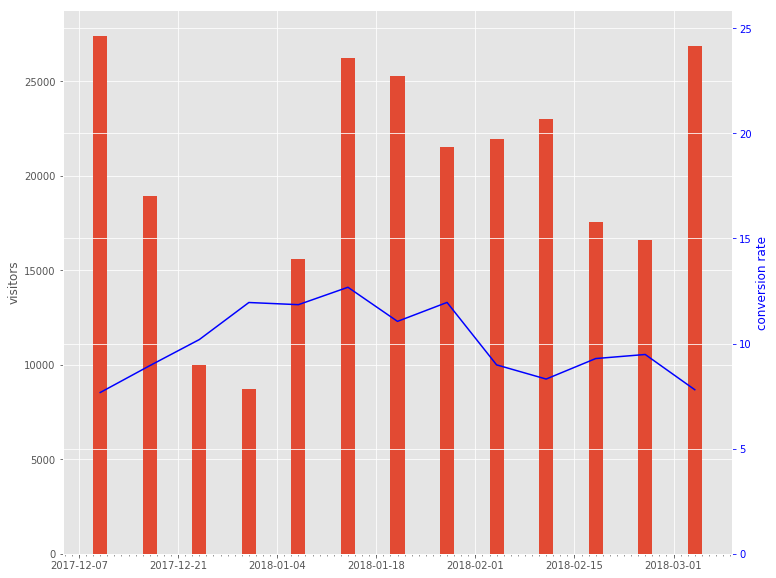

In [36]:
%matplotlib inline
plt.style.use('ggplot')
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

fig, ax = plt.subplots(figsize=(12, 10))
ax.bar(metrics.index, metrics['visitors'], width=2)

#set ticks every week (Sunday)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=SU))

# set minor ticks to every day
ax.xaxis.set_minor_locator(mdates.DayLocator())

#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.set_ylabel('visitors')

ax2 = ax.twinx()

ax2.plot(metrics.index, metrics['conversion_rate'], 'b')

ax2.set_ylabel('conversion rate', color='b')
ax2.tick_params('y', colors='b')
ax2.set_ylim(bottom = 0, top = (ax2.get_ylim()[1] * 2))

### How does quote conversion vary by channel?

* **Conversion is the rate of quote saves vs. visitors.**

In [119]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

df = pd.read_csv('../data/raw/ga.csv', header=0, parse_dates=['date'], date_parser=dateparse, index_col='date')

In [120]:
def calc_conversion_rate(visitors, save_quotes):
    return save_quotes/visitors * 100

metric_summaries_by_channel = df.groupby(['category', 'metric']).sum()

conversion_rates_by_channel = metric_summaries_by_channel.groupby(level=0) \
                                .apply(lambda x: calc_conversion_rate(x.loc[(x.name, 'visitors')], 
                                                      x.loc[(x.name, 'save_quote')]))
conversion_rates_by_channel

,value
category,
Branded Search,16.758545
Direct Traffic,2.467282
Generic Search,9.319679
Organic,11.934185
Paid search,6.427023
Referral link,28.259752


In [121]:
df.groupby(['category']).sum()

,value
category,
Branded Search,23111
Direct Traffic,32606
Generic Search,200407
Organic,27319
Paid search,113793
Referral link,51098


In [122]:
data = df.groupby(['category', 'metric'])["value"].sum().sort_values(ascending=False).reset_index()

data = data.groupby('metric').apply(
    lambda f: f.groupby('category').apply(
        lambda g: g['value'].values
    ))
data = data.T
data['sum'] = df.groupby('category')['value'].sum()
data = data.sort_values(by='sum', ascending=False)
data

metric,app_store,complete_quote,save_quote,start_quote,visitors,sum
category,,,,,,
Generic Search,[4231],[29696],[11003],[37415],[118062],200407
Paid search,[1361],[17662],[4300],[23565],[66905],113793
Referral link,[1361],[10383],[6049],[11900],[21405],51098
Direct Traffic,[793],[1427],[690],[1730],[27966],32606
Organic,[1328],[4604],[1719],[5264],[14404],27319
Branded Search,[637],[4543],[1824],[5223],[10884],23111


In [123]:
data.drop('sum', axis=1, inplace=True) 

In [124]:
print(conversion_rates_by_channel)
conversion_rates_by_channel = conversion_rates_by_channel.reindex(data.index)
print(conversion_rates_by_channel)

                    value
category                 
Branded Search  16.758545
Direct Traffic   2.467282
Generic Search   9.319679
Organic         11.934185
Paid search      6.427023
Referral link   28.259752
                    value
category                 
Generic Search   9.319679
Paid search      6.427023
Referral link   28.259752
Direct Traffic   2.467282
Organic         11.934185
Branded Search  16.758545


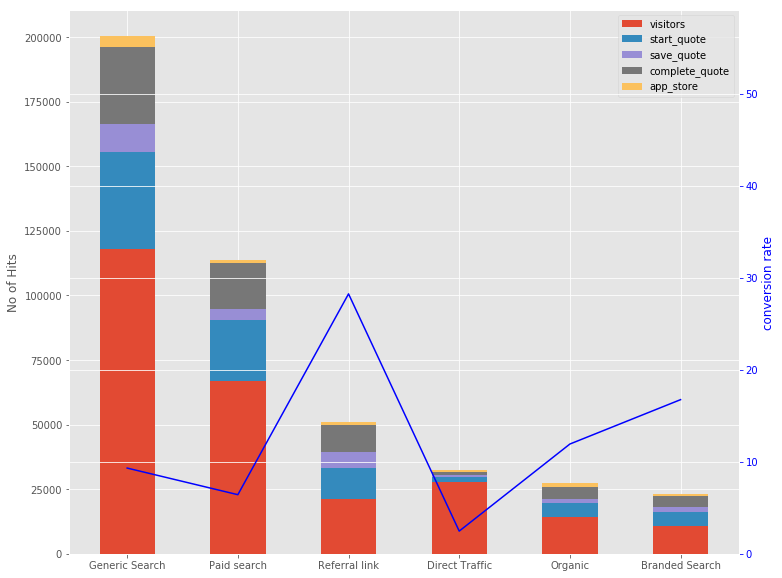

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt

ind = np.arange(len(data.index))

fig, ax = plt.subplots(figsize=(12, 10))
width = 0.5   

i = 0
ny = len(data.index)
cum_size = np.zeros(ny)

# reverse the order of the columns to render 'visitors' column first.
for column in data.columns[::-1]:
    
    dat = np.concatenate(data[column].values, axis=0)
    ax.bar(ind, dat, width, bottom=cum_size, label=column)
    
    cum_size += dat

ax.set_ylabel('No of Hits')
ax.set_xticks(np.arange(len(data.index)))
ax.set_xticklabels(data.index)
ax.legend()

ax2 = ax.twinx()

ax2.plot(data.index, conversion_rates_by_channel.values, 'b')

ax2.set_ylabel('conversion rate', color='b')
ax2.tick_params('y', colors='b')
ax2.set_ylim(bottom = 0, top = (ax2.get_ylim()[1] * 2))

plt.show()